In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Load the survey data
file_path = '/Users/norika_machome/Downloads/TAR_MM/updated_results.csv'
survey_data = pd.read_csv(file_path)

# Clean column names for easier analysis
survey_data.columns = survey_data.columns.str.strip().str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Visualizing data for Whole Population...
Plot saved as /Users/norika_machome/Downloads/TAR_MM/whole/Whole Population_PieChart_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/whole/Whole Population_Likert_Scale_Responses_to_Tree-Related_Questions_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/whole/Whole Population_Actions_Taken_for_Soil_Health_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/whole/Whole Population_Microbe-Related_Responses_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/whole/Whole Population_Preferred_Video_Length_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/whole/Whole Population_Preferred_Platforms_for_Videos_1.png


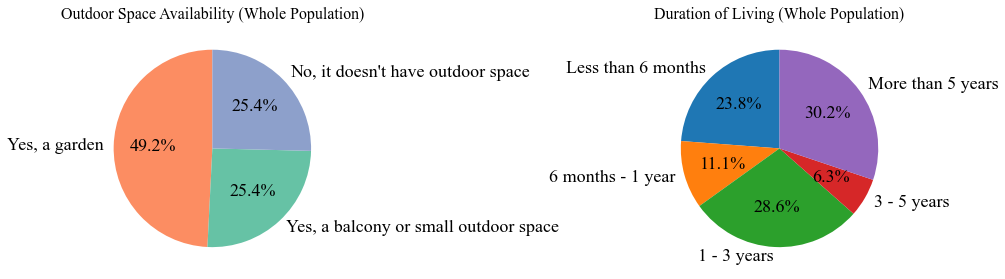

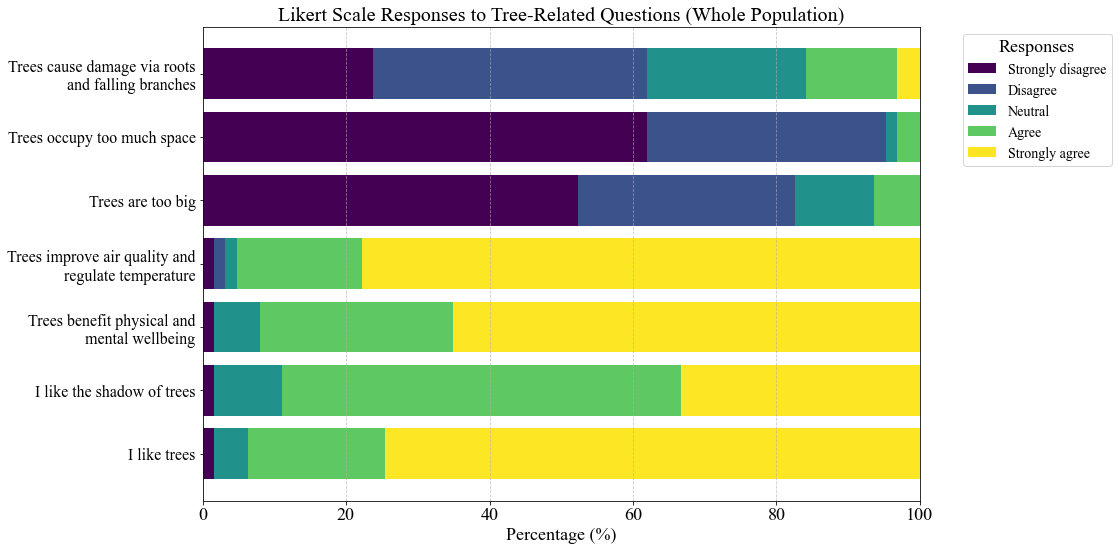

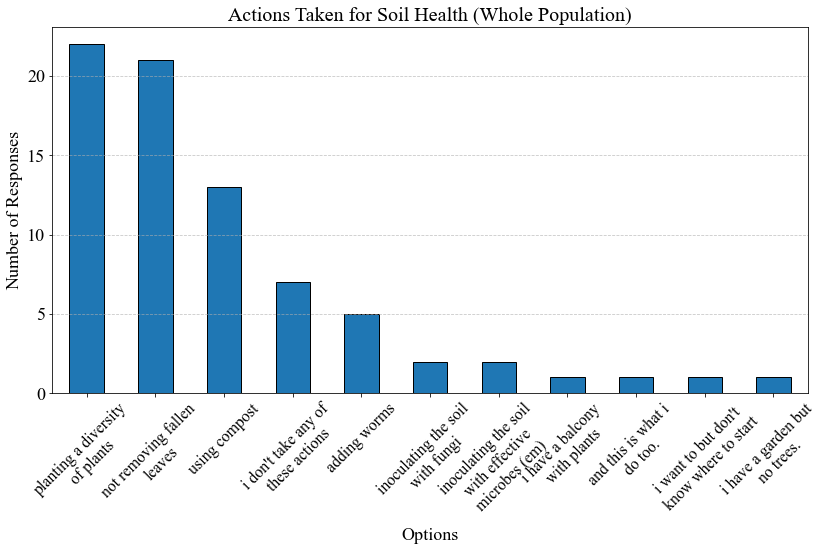

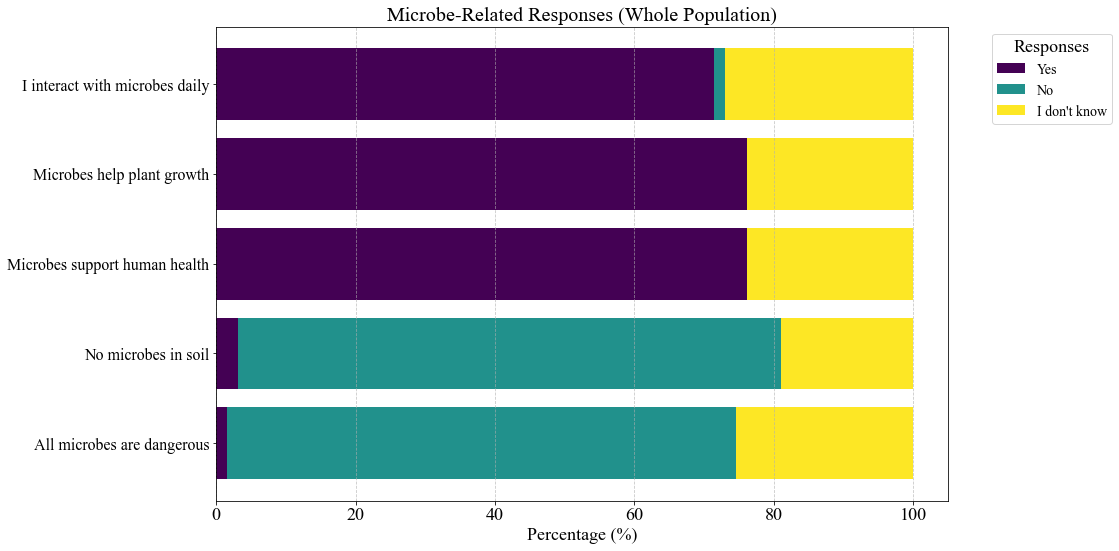

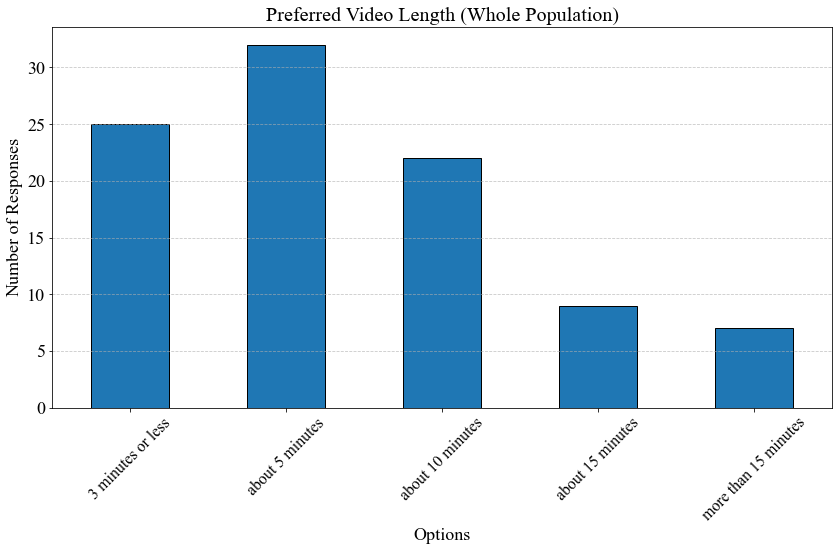

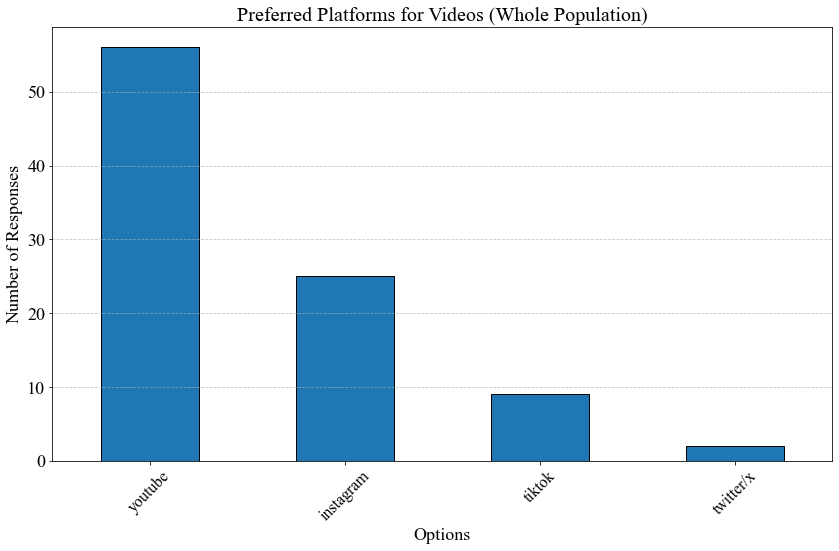

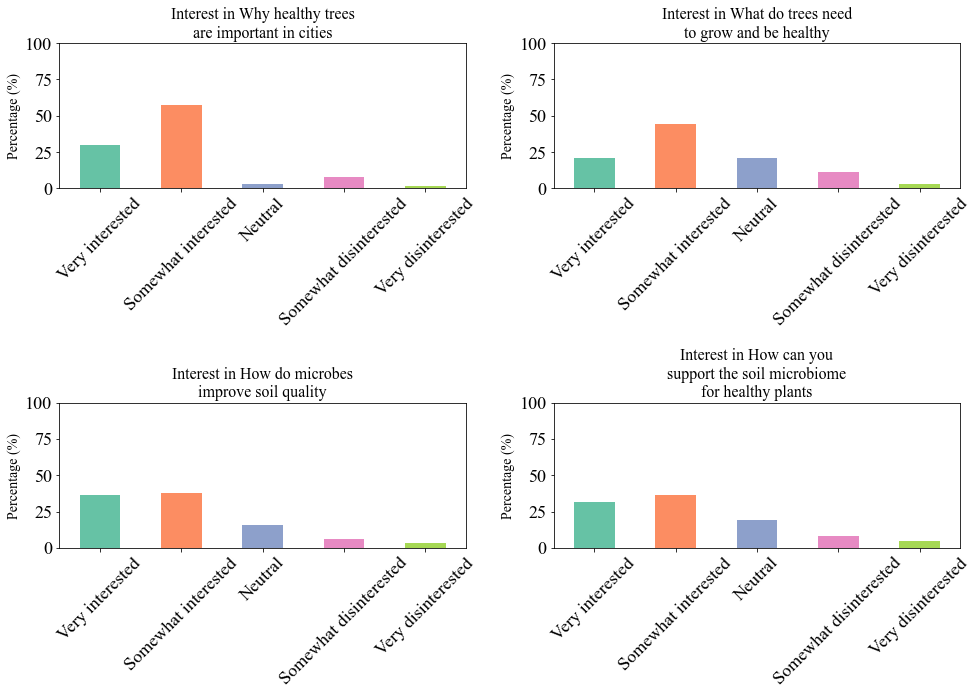

Visualizing data for Age 25-39...
Plot saved as /Users/norika_machome/Downloads/TAR_MM/target/Age 25-39_PieChart_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/target/Age 25-39_Likert_Scale_Responses_to_Tree-Related_Questions_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/target/Age 25-39_Actions_Taken_for_Soil_Health_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/target/Age 25-39_Microbe-Related_Responses_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/target/Age 25-39_Preferred_Video_Length_1.png
Plot saved as /Users/norika_machome/Downloads/TAR_MM/target/Age 25-39_Preferred_Platforms_for_Videos_1.png


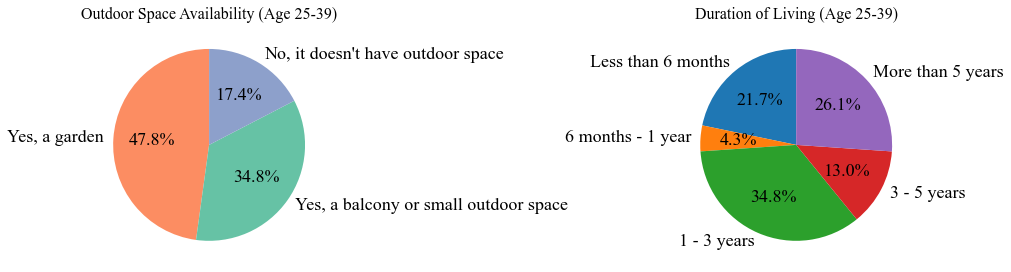

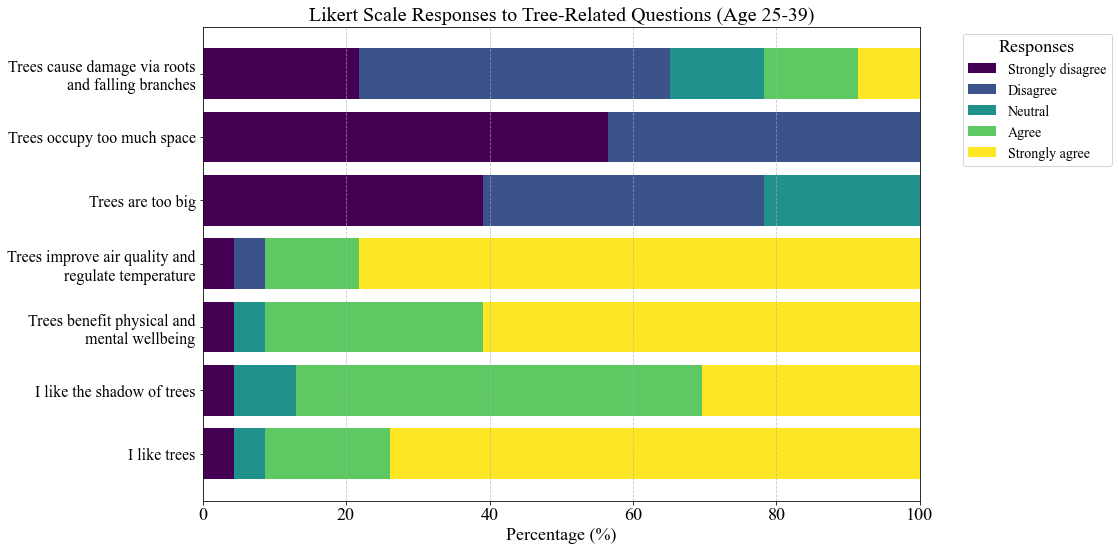

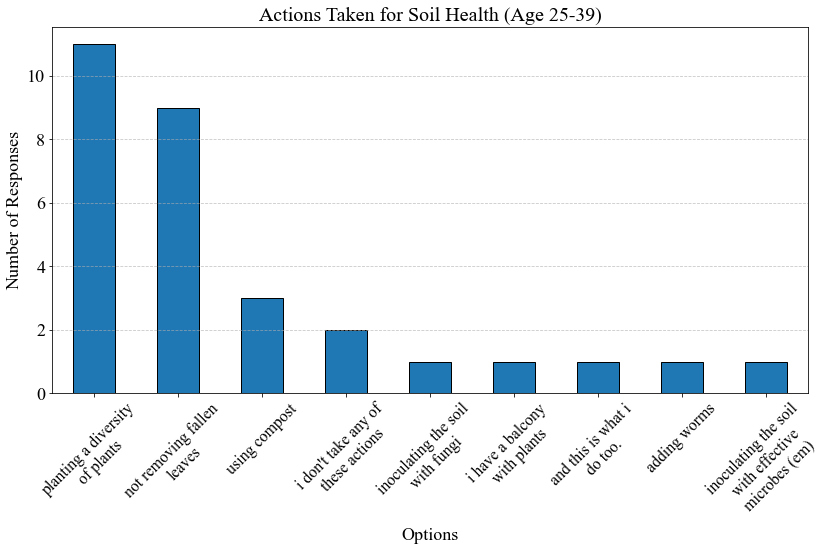

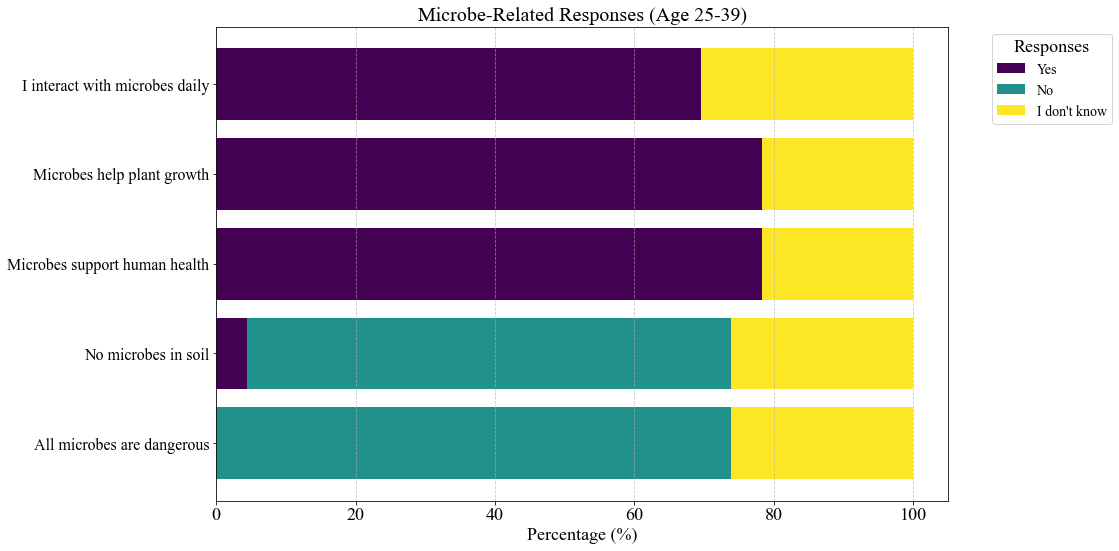

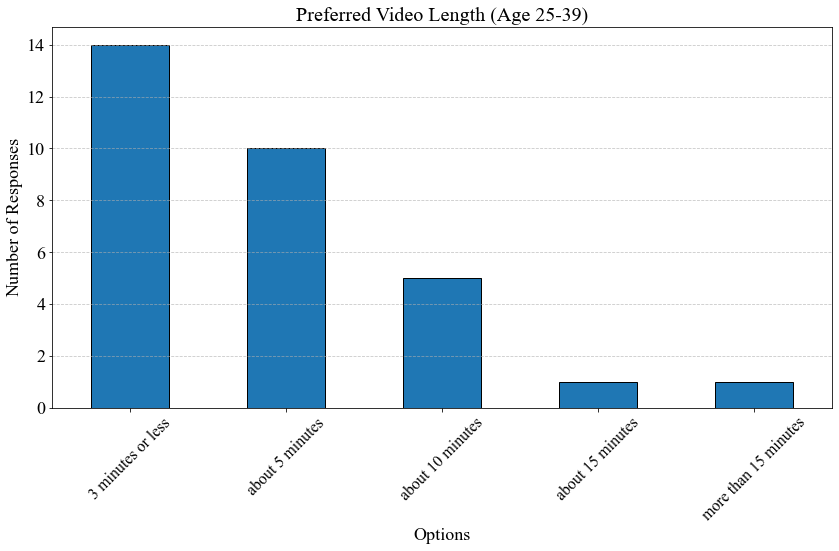

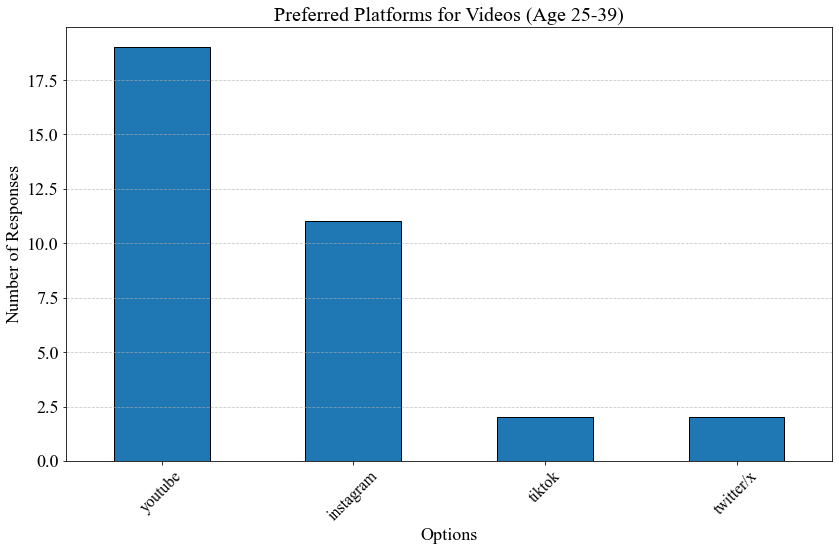

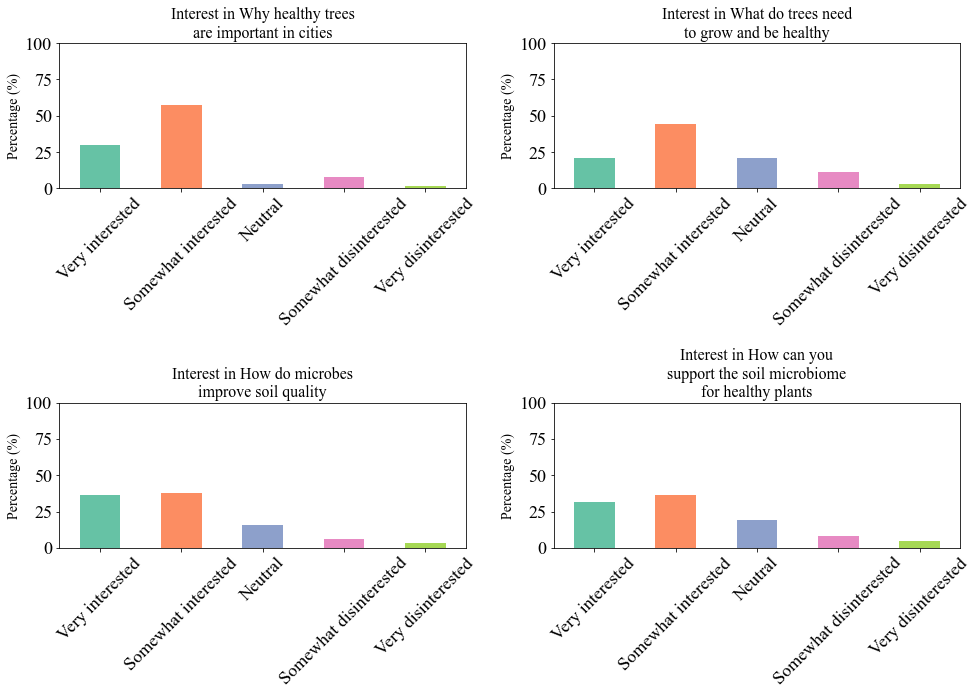

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import textwrap
import os

# Set global font style and size for consistency
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 18  # Increased font size for better readability
})

def save_plot(fig, filename):
    """Save the plot as a PNG file in the specified directory"""
    fig.savefig(filename, bbox_inches='tight')
    print(f"Plot saved as {filename}")

def horizontal_stacked_likert_chart(data, questions, renamed_questions, group_label, chart_title, ordered_categories, save_path=None, plot_suffix=''):
    # Apply value counts and normalize to percentages
    df = data[questions].apply(pd.Series.value_counts).fillna(0)
    df = df.div(df.sum(axis=0), axis=1) * 100

    # Ensure the order of categories is correct
    df = df.reindex(ordered_categories)

    # Generate a colormap with evenly spaced colors
    cmap = cm.get_cmap('viridis', len(ordered_categories))  # 'viridis' is perceptually uniform
    colors = [cmap(i) for i in range(len(ordered_categories))]

    # Wrap y-tick labels
    wrapped_labels = ['\n'.join(textwrap.wrap(label, width=30)) for label in renamed_questions]

    # Stacked bar chart (horizontal)
    categories = df.index.tolist()
    y = np.arange(len(questions))
    fig, ax = plt.subplots(figsize=(16, 8))  # Adjust size for better readability

    left = np.zeros(len(questions))
    for i, category in enumerate(categories):
        ax.barh(y, df.loc[category], left=left, label=category, color=colors[i])
        left += df.loc[category]

    # Add labels and titles
    ax.set_yticks(y)
    ax.set_yticklabels(wrapped_labels, fontsize=16)
    ax.set_title(f"{chart_title} ({group_label})", fontsize=20)
    ax.set_xlabel('Percentage (%)', fontsize=18)
    ax.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

    # Add gridlines and layout adjustments
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save plot if a path is provided
    if save_path:
        save_plot(fig, os.path.join(save_path, f"{group_label}_{chart_title.replace(' ', '_')}_{plot_suffix}.png"))
    else:
        plt.show()

def plot_side_by_side_pie_charts(data, group_label, save_path=None, plot_suffix=''):
    # Define a consistent color palette for categories
    color_map = {
        'Yes, a balcony or small outdoor space': '#66c2a5',  # Light Green
        'Yes, a garden': '#fc8d62',  # Orange
        'No, it doesn\'t have outdoor space': '#8da0cb',  # Light Blue
    }

    fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Create 1 row, 2 columns of subplots

    # Outdoor Space Distribution
    outdoor_space_dist = data['Does_the_house_that_you_currently_live_in_have_an_outdoor_space'].value_counts()
    outdoor_space_dist.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        ax=axes[0],
        colors=[color_map.get(label, '#cccccc') for label in outdoor_space_dist.index]  # Use consistent colors
    )
    axes[0].set_title(f'Outdoor Space Availability ({group_label})', fontsize=16)
    axes[0].set_ylabel('')

    # Duration of Living
    living_duration_order = [
        'Less than 6 months',
        '6 months - 1 year',
        '1 - 3 years',
        '3 - 5 years',
        'More than 5 years'
    ]
    living_duration_dist = (
        data['How_long_have_you_been_living_in_your_current_house']
        .value_counts()
        .reindex(living_duration_order)
        .fillna(0)
    )
    living_duration_dist.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        ax=axes[1]
    )
    axes[1].set_title(f'Duration of Living ({group_label})', fontsize=16)
    axes[1].set_ylabel('')

    # Adjust layout and show
    plt.tight_layout()

    # Save plot if a path is provided
    if save_path:
        save_plot(fig, os.path.join(save_path, f"{group_label}_PieChart_{plot_suffix}.png"))
    else:
        plt.show()


def bar_chart(data, column, group_label, chart_title, exclude=None, x_wrap=20, x_order=None, save_path=None, plot_suffix=''):
    # Extract and count responses
    data_dist = data[column].str.split(',').explode()

    # Normalize the responses for consistent exclusion
    data_dist = data_dist.str.strip().str.lower()

    if exclude:
        # Normalize the exclusion list for consistent comparison
        exclude = [ex.lower() for ex in exclude]
        data_dist = data_dist[~data_dist.isin(exclude)]

    data_dist = data_dist.value_counts()

    # Order x-ticks if specified
    if x_order:
        # Normalize the x_order list for consistent ordering
        x_order = [x.lower() for x in x_order]
        data_dist = data_dist.reindex(x_order).fillna(0)

    # Wrap x-tick labels
    wrapped_labels = ['\n'.join(textwrap.wrap(label, width=x_wrap)) for label in data_dist.index]

    # Plot bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    data_dist.plot(kind='bar', edgecolor='black')
    plt.title(f'{chart_title} ({group_label})', fontsize=20)
    plt.xlabel('Options', fontsize=18)
    plt.ylabel('Number of Responses', fontsize=18)
    plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=45, fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save plot if a path is provided
    if save_path:
        save_plot(fig, os.path.join(save_path, f"{group_label}_{chart_title.replace(' ', '_')}_{plot_suffix}.png"))
    else:
        plt.show()


# Function for visualizing data
def visualize_data(data, group_label, save_dir=None):
    print(f"Visualizing data for {group_label}...")

    # Define save path if saving plots
    if save_dir:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plot_suffix = len(os.listdir(save_dir)) + 1  # Create a unique suffix for each plot
    else:
        plot_suffix = ''

    # Circle Chart for Outdoor Space Distribution
    plot_side_by_side_pie_charts(data, group_label, save_path=save_dir, plot_suffix=plot_suffix)

    # Likert Scale Graph for Tree-Related Questions
    tree_columns = [
        'How_much_do_you_agree_with_the_following_statements_about_trees_I_like_trees',
        'How_much_do_you_agree_with_the_following_statements_about_trees_I_like_the_shadow_of_trees',
        'How_much_do_you_agree_with_the_following_statements_about_trees_Trees_are_good_for_the_physical_and_mental_wellbeing_of_people_',
        'How_much_do_you_agree_with_the_following_statements_about_trees_Trees_play_an_important_role_in_improving_the_air_quality_and_temperature_regulation_of_cities_',
        'How_much_do_you_agree_with_the_following_statements_about_trees_Trees_are_too_big',
        'How_much_do_you_agree_with_the_following_statements_about_trees_Trees_occupy_too_much_space_on_parking_lots_and_sidewalks',
        'How_much_do_you_agree_with_the_following_statements_about_trees_Trees_cause_damage_to_humans_and_property_because_of_their_roots_and_falling_leaves_and_branches'
    ]

    renamed_tree_columns = [
        'I like trees',
        'I like the shadow of trees',
        'Trees benefit physical and mental wellbeing',
        'Trees improve air quality and regulate temperature',
        'Trees are too big',
        'Trees occupy too much space',
        'Trees cause damage via roots and falling branches'
    ]
    horizontal_stacked_likert_chart(data, tree_columns, renamed_tree_columns, group_label, "Likert Scale Responses to Tree-Related Questions", ordered_categories=['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'], save_path=save_dir, plot_suffix=plot_suffix)

    # Bar Chart for Soil Health Actions
    bar_chart(data, 'If_you_have_a_garden_do_you_take_any_of_these_actions_to_support_the_health_of_the_soil', group_label, 'Actions Taken for Soil Health', exclude=["I don't have a garden", "I dont have a garden but my parents do so this is what they do for better soil"], x_wrap=20, save_path=save_dir, plot_suffix=plot_suffix)

    # Likert Scale Graph for Microbe-Related Questions
    microbe_columns = [
        'Do_you_agree_with_these_statements_about_microbes_All_microbes_are_dangerous',
        'Do_you_agree_with_these_statements_about_microbes_There_are_no_microbes_in_the_soil',
        'Do_you_agree_with_these_statements_about_microbes_Microbes_support_human_health',
        'Do_you_agree_with_these_statements_about_microbes_Microbes_can_help_the_growth_of_plants_',
        'Do_you_agree_with_these_statements_about_microbes_I_interact_with_microbes_every_day'
    ]
    renamed_microbe_columns = [
        'All microbes are dangerous',
        'No microbes in soil',
        'Microbes support human health',
        'Microbes help plant growth',
        'I interact with microbes daily'
    ]
    horizontal_stacked_likert_chart(data, microbe_columns, renamed_microbe_columns, group_label, "Microbe-Related Responses", ordered_categories=['Yes', 'No', "I don't know"], save_path=save_dir, plot_suffix=plot_suffix)

    # Bar Chart for Preferred Video Length
    bar_chart(data, 'What_length_would_you_want_such_a_video_to_be', group_label, 'Preferred Video Length', x_wrap=20, x_order=["3 minutes or less", "About 5 minutes", "About 10 minutes", "About 15 minutes", "More than 15 minutes"], save_path=save_dir, plot_suffix=plot_suffix)

    # Bar Chart for Preferred Video Platforms
    bar_chart(data, 'On_what_platform_would_you_prefer_watching_such_a_video', group_label, 'Preferred Platforms for Videos', exclude=None, x_wrap=20, x_order=['Youtube', 'Instagram', 'TikTok', 'Twitter/X'], save_path=save_dir, plot_suffix=plot_suffix)



    # Assuming survey_data is your dataframe
    topics_columns = [
        'How_interested_would_you_be_in_watching_a_video_about_the_following_topics_Why_healthy_trees_are_important_in_cities',
        'How_interested_would_you_be_in_watching_a_video_about_the_following_topics_What_do_trees_need_to_grow_and_be_healthy_',
        'How_interested_would_you_be_in_watching_a_video_about_the_following_topics_How_do_microbes_improve_soil_quality',
        'How_interested_would_you_be_in_watching_a_video_about_the_following_topics_How_can_you_support_the_soil_microbiome_for_healthy_plants'
    ]

    topic_titles = [
        'Why healthy trees are important in cities',
        'What do trees need to grow and be healthy',
        'How do microbes improve soil quality',
        'How can you support the soil microbiome for healthy plants'
    ]

    response_categories = ['Very interested', 'Somewhat interested', 'Neutral', 'Somewhat disinterested', 'Very disinterested']

    # Prepare the figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Loop through each topic and create a stacked bar chart
    for idx, topic in enumerate(topics_columns):
        ax = axes[idx // 2, idx % 2]  # Select subplot location

        # Get response counts and normalize to percentages
        response_counts = survey_data[topic].value_counts().reindex(response_categories)
        response_percentages = response_counts / response_counts.sum() * 100  # Convert to percentages
        
        # Create the stacked bar chart
        response_percentages.plot(kind='bar', stacked=True, ax=ax, color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])
        
        # Wrap the title text
        wrapped_title = textwrap.fill(f'Interest in {topic_titles[idx]}', width=30)  # Adjust the width as needed
        ax.set_title(wrapped_title, fontsize=16)
        
        ax.set_ylabel('Percentage (%)', fontsize=14)
        ax.set_xticklabels(response_categories, rotation=45)
        ax.set_ylim(0, 100)

    # Adjust layout to avoid overlapping labels
    plt.tight_layout()
    plt.show()

# Example Usage for saving plots to the local directory
visualize_data(survey_data, 'Whole Population', save_dir='/Users/norika_machome/Downloads/TAR_MM/whole')  # Specify your desired save path

# Analyze target group (Age 25-39)
target_group = survey_data[survey_data['What_is_your_age'] == '25 to 39']
visualize_data(target_group, 'Age 25-39', save_dir='/Users/norika_machome/Downloads/TAR_MM/target')


In [23]:
survey_data.columns

Index(['Tijdstempel',
       'I_am_over_18_years_old_and_I_agree_that_my_responses_may_be_used_for_this_project',
       'What_is_your_age',
       'Does_the_house_that_you_currently_live_in_have_an_outdoor_space',
       'How_long_have_you_been_living_in_your_current_house',
       'How_much_do_you_agree_with_the_following_statements_about_trees_I_like_trees',
       'How_much_do_you_agree_with_the_following_statements_about_trees_Trees_are_too_big',
       'How_much_do_you_agree_with_the_following_statements_about_trees_I_like_the_shadow_of_trees',
       'How_much_do_you_agree_with_the_following_statements_about_trees_Trees_are_good_for_the_physical_and_mental_wellbeing_of_people_',
       'How_much_do_you_agree_with_the_following_statements_about_trees_Trees_occupy_too_much_space_on_parking_lots_and_sidewalks',
       'How_much_do_you_agree_with_the_following_statements_about_trees_Trees_play_an_important_role_in_improving_the_air_quality_and_temperature_regulation_of_cities_',
   

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Most common words: [('trees', 14), ('nice', 4), ('also', 3), ('animals', 3), ('could', 3), ('people', 3), ('birds', 3), ('wildlife', 3), ('beautifull', 2), ('lot', 2)]

Sentiment Analysis: {'neg': 0.041, 'neu': 0.729, 'pos': 0.23, 'compound': 0.9973}


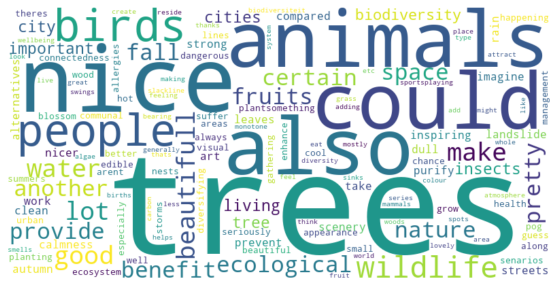

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# Ensure you have the required resources downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Set global font style and size for consistency
plt.rcParams.update({
    'font.family': 'Times New Roman',  # Update font family
    'font.size': 16  # Increased font size for better readability
})

# Text input (all the statements you provided)
text = """
Trees are beautifull! It is just a lot of work to clean up the leaves in autumn
Calmness and inspiring for art
They are also nice for the scenery and good for animals.
Trees make dull streets nicer
Purify water, prevent landslide after strong rain
compared to other ecological alternatives I could imagine they take a lot of space while another plant/something along those lines could provide more to the ecosystem in certain senarios.
More trees, more better. Always. But seriously, why aren’t we planting more trees in urban areas that grow edible fruits? This could enhance the health of people, as well as their connectedness to nature.
Trees are so pretty!!!! Can be dangerous during storms when they fall down but there's only a small chance of that happening i guess
Benefit more birds and animals. They can be pretty especially when they have blossom.
Wood, pog
Trees are beautiful!
People with allergies suffer
Trees are important for birds and other wildlife that make nests there
they cool down the city in hot summers
Water management in cities
Diversifying the visual appearance of the city, communal gathering space, sports/playing spots (slackline, swings etc)
They add to colour diversity making cities feel less monotone and provide a place for certain type of wildlife to reside in
In the tree there is a whole world of living animals, insects who are living with and thanks the tree. Ecological system.
This might fall under ''I like trees", but trees are generally very nice to look at and (can) create a nice atmosphere and feeling of being in nature.
They attract a series of wildlife, which helps with biodiversity
Not as great carbon sinks as algae or grass
Another benefit that I can think of are that you also have fruit bearing trees with fruits you can eat, so thats nice.
Trees smells lovely in the woods
Births and insects live in the trees and that is good for the biodiversiteit.
Trees are important for birds and mammals.
Not only the well-being of people, but also adding to the biodiversity of an area.
Trees are mostly beautifull
"""

# Clean the text and tokenize
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Frequency analysis
word_counts = Counter(filtered_tokens)

# Most common words
common_words = word_counts.most_common(10)

# Sentiment analysis using SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(text)

# Font path (path to Times New Roman on your system)

# Plotting word frequency using WordCloud with custom font
wordcloud = WordCloud(width=800, height=400, background_color='white',).generate_from_frequencies(word_counts)

# Displaying results
print("Most common words:", common_words)
print("\nSentiment Analysis:", sentiment_scores)

# Plot wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Most common words: [('organisms', 16), ('small', 14), ('bacteria', 12), ('tiny', 7), ('little', 5), ('everywhere', 4), ('creatures', 4), ('dont', 3), ('health', 3), ('essential', 3)]

Sentiment Analysis: {'neg': 0.043, 'neu': 0.857, 'pos': 0.1, 'compound': 0.9447}


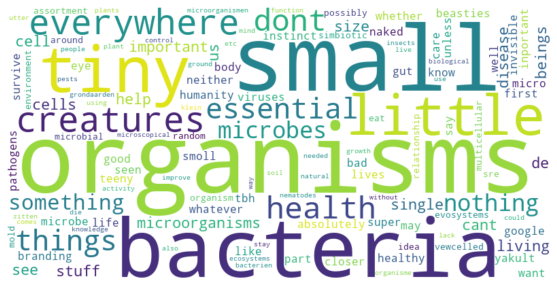

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# Ensure you have the required resources downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Set global font style and size for consistency
plt.rcParams.update({
    'font.family': 'Times New Roman',  # Update font family
    'font.size': 16  # Increased font size for better readability
})

# Text input (all the statements you provided)
text = """
Whatever, I don't know and I don't care tbh, unless it is SUPER inportant!
Nothing 
Google - “what are microbes?”
Tiny organisms like bacteria
health
Something very tiny, something in our body, 
very small organisms that are an essential part of life
Absolutely essential for humanity to survive
Bacteria
Microorganisms?
bacteria
Small things 
Tiny things
Small organisms
Small living organisms 
Tiny organisms
Bacteria, disease, Yakult and their "healthy gut microbe" branding
Bacteria
Microorganisms
Small organisms that can't be seen
Smoll
little beasties, bacteria, cells
Bacteria, viruses, pathogens, tiny things
Little beings that are everywhere, whether we want it or not and that are neither bad or good but just beings. 
Bacteria
Teeny tiny bacteria that lives everywhere
Well my first instinct is to just say microbes but organisms that are invisible to the naked eye may be closer
Small
micro size organisms
Bacteria and other small creatures
Bacteria essential for all size evosystems
Small organisms that do stuff, that possibly have some simbiotic relationship with some other organism
mold
Small living organisms all around us and on us, that eat very random assortment of stuff from the environment
They sre important
Small single cell or multicellular organisms.
No idea
Small cells
Nothing 
Small (vew-celled) organisms
Disease
microbial organisms
Microscopical single cell organisms that are everywhere and ecosystems could not function without them.
Bacterien etc
You don’t see them but they are very important for the activity in the ground
Help
Using nematodes or other insects to control pests in a natural way but also use them to improve plant growth and health 
Only my utter lack of biological knowledge comes to mind
All the little bacteria that we can't see
Over de micro-organismen die in de grond/aarden zitten??
Little creatures that live everywhere.
Small organisms
Small creatures that help stay the soil, plants and people health
Needed.
Little organisms
Tiny creatures
Klein organisme
"""

# Clean the text and tokenize
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Frequency analysis
word_counts = Counter(filtered_tokens)

# Most common words
common_words = word_counts.most_common(10)

# Sentiment analysis using SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(text)

# Font path (path to Times New Roman on your system)

# Plotting word frequency using WordCloud with custom font
wordcloud = WordCloud(width=800, height=400, background_color='white',).generate_from_frequencies(word_counts)

# Displaying results
print("Most common words:", common_words)
print("\nSentiment Analysis:", sentiment_scores)

# Plot wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


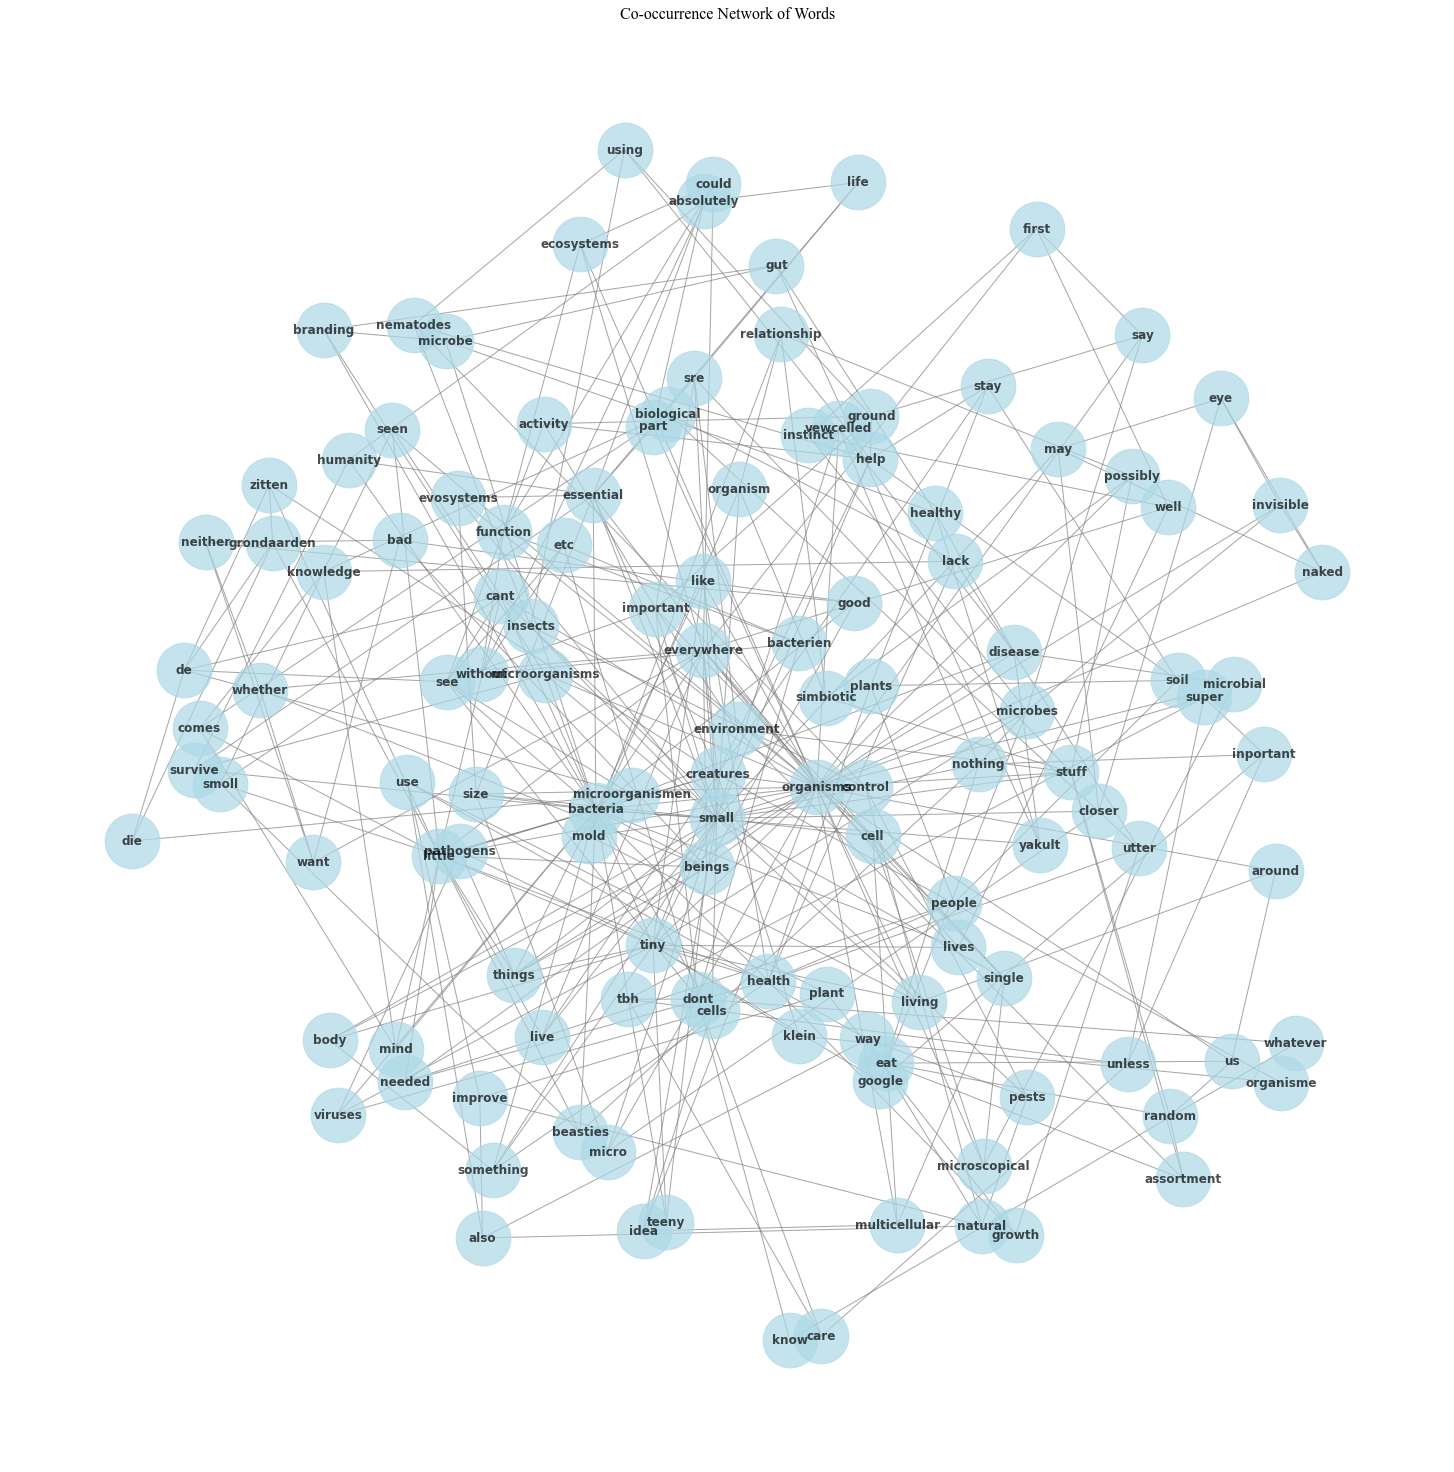

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt
import re
from collections import Counter
import itertools

# Ensure required resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Text input (same as before)
text = """
Trees are beautifull! It is just a lot of work to clean up the leaves in autumn
Calmness and inspiring for art
They are also nice for the scenery and good for animals.
Trees make dull streets nicer
Purify water, prevent landslide after strong rain
compared to other ecological alternatives I could imagine they take a lot of space while another plant/something along those lines could provide more to the ecosystem in certain senarios.
More trees, more better. Always. But seriously, why aren’t we planting more trees in urban areas that grow edible fruits? This could enhance the health of people, as well as their connectedness to nature.
Trees are so pretty!!!! Can be dangerous during storms when they fall down but there's only a small chance of that happening i guess
Benefit more birds and animals. They can be pretty especially when they have blossom.
Wood, pog
Trees are beautiful!
People with allergies suffer
Trees are important for birds and other wildlife that make nests there
they cool down the city in hot summers
Water management in cities
Diversifying the visual appearance of the city, communal gathering space, sports/playing spots (slackline, swings etc)
They add to colour diversity making cities feel less monotone and provide a place for certain type of wildlife to reside in
In the tree there is a whole world of living animals, insects who are living with and thanks the tree. Ecological system.
This might fall under ''I like trees", but trees are generally very nice to look at and (can) create a nice atmosphere and feeling of being in nature.
They attract a series of wildlife, which helps with biodiversity
Not as great carbon sinks as algae or grass
Another benefit that I can think of are that you also have fruit bearing trees with fruits you can eat, so thats nice.
Trees smells lovely in the woods
Births and insects live in the trees and that is good for the biodiversiteit.
Trees are important for birds and mammals.
Not only the well-being of people, but also adding to the biodiversity of an area.
Trees are mostly beautifull
"""

# Clean the text and tokenize
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Create a co-occurrence network
def create_co_occurrence_network(tokens, window_size=2):
    G = nx.Graph()
    
    # Create pairs of words that occur within a specific window
    for i in range(len(tokens) - window_size + 1):
        window = tokens[i:i + window_size]
        for pair in itertools.combinations(window, 2):
            if pair[0] != pair[1]:
                # Add edges to the graph
                if G.has_edge(pair[0], pair[1]):
                    G[pair[0]][pair[1]]['weight'] += 1  # Increase weight for repeated co-occurrence
                else:
                    G.add_edge(pair[0], pair[1], weight=1)
    
    return G

# Create the network
G = create_co_occurrence_network(filtered_tokens, window_size=3)

# Plot the co-occurrence network
plt.figure(figsize=(20, 20))

# Increase k value for more separation between nodes
pos = nx.spring_layout(G, k=0.8, iterations=50)

# Draw the graph with improved layout and avoid node overlap
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray', alpha=0.7)

# Display the plot
plt.title('Co-occurrence Network of Words', fontsize=16)
plt.show()
